In [325]:
from math import pi,sin,cos
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import handcalcs.render
import sympy as sym

In [335]:
s,T1,T2 = sym.symbols('s,T1,T2')

In [336]:
#Define 2 order system 
ks = 10.0
T1 = 10.0
T2 = 1.0

In [337]:
%%render
ds = sym.expand((1+T1*s)*(1+s*T2))

<IPython.core.display.Latex object>

In [338]:
dn = sym.Poly(ds,s)
den = dn.coeffs()
print(den)

[10.0000000000000, 11.0000000000000, 1.00000000000000]


In [340]:
num1 = [ks]
den1 = np.array(den, dtype = 'float')
print(den1)

[10. 11.  1.]


In [341]:
F1 = ct.tf(num1,den1)

In [342]:
t1,yF1 = ct.step_response(F1)

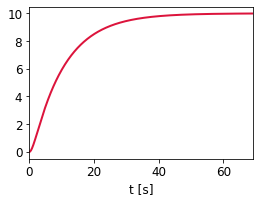

In [343]:
plt.figure(figsize = (4,2.8))
plt.rc('font', size =12)
plt.plot(t1,yF1,'crimson', lw = 2)
plt.xlim(t1[0],t1[-1])
plt.xlabel('t [s]')
plt.show()

## Magnitude Optimum

In [344]:
kR = Ti/(2*ks*T2)
Ti = T1
numPI = [kR*Ti, kR]
DenPI = [Ti,0]
FR = ct.tf(numPI,DenPI)

In [345]:
G1 = ct.tf2io(F1, inputs ='u', outputs = 'y')
Gr = ct.tf2io(FR, inputs = 'e', outputs = 'u')
sumblk = ct.summing_junction(inputs = ['r','-y'], outputs = 'e')
G1

<LinearIOSystem:sys[222]:['u']->['y']>

In [346]:
G1cc = ct.interconnect(
        [G1,Gr,sumblk],
#         connections = [['G1.u','Gr.y'],
#                        ['PI.u','-sys.y'],
#                        ['PI.u','ref.u']
#                       ],
    inplist = ['r'],
    outlist = ['y']
)

In [347]:
ts = np.arange(0,15,0.01)

In [348]:
t,ycc = ct.input_output_response(G1cc,ts,1.0,[0,0])

(0.0, 69.07755278982131)

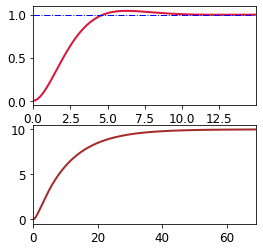

In [349]:
plt.figure(201, figsize = (4,4))
plt.subplot(2,1,1)
plt.plot(t,ycc,'crimson', lw = 2)
plt.axhline(1.0, c = 'b',ls = "-.", lw = 1)
plt.xlim(ts[0],ts[-1])
plt.subplot(2,1,2)
plt.plot(t1,yF1,'brown', lw = 2)
plt.xlim(t1[0],t1[-1])

## Symmetrical Optimum

In [350]:
a1 = 2.0
kR2 = T1/(a1*ks*T2)
Ti2 = a1**2*T2
numPI2 = [kR2*Ti2, kR2]
DenPI2 = [Ti2,0]
FR2 = ct.tf(numPI2,DenPI2)

In [351]:
Gr2 = ct.tf2io(FR2, inputs = 'e', outputs = 'u')

In [352]:
G1cc2 = ct.interconnect(
        [G1,Gr2,sumblk],
#         connections = [['G1.u','Gr.y'],
#                        ['PI.u','-sys.y'],
#                        ['PI.u','ref.u']
#                       ],
    inplist = ['r'],
    outlist = ['y']
)

In [353]:
t,ycc2 = ct.input_output_response(G1cc2,ts,1.0,[0,0])

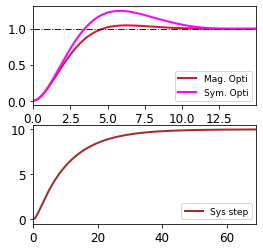

In [354]:
plt.figure(201, figsize = (4,4))
plt.subplot(2,1,1)
plt.plot(t,ycc,'crimson', lw = 2, label = "Mag. Opti")
plt.plot(t,ycc2,'magenta', lw = 2, label = "Sym. Opti")
plt.axhline(1.0, c = 'b',ls = "-.", lw = 1)
plt.legend(loc = 'lower right', fontsize = 9)
plt.xlim(ts[0],ts[-1])
plt.subplot(2,1,2)
plt.plot(t1,yF1,'brown', lw = 2, label = 'Sys step')
plt.xlim(t1[0],t1[-1])
plt.legend(loc = 'lower right', fontsize = 9)
plt.show()

### Higher order systems

In [355]:
s,T1,Ts1,Ts2,Ts3,Ts4 = sym.symbols('s,T1,Ts1,Ts2,Ts3,Ts4')

In [356]:
T1 = 10.0
Ts1 = 0.01
Ts2 = 0.025
Ts3 = 0.015
Ts4 = 0.03

In [357]:
apoly = sym.expand((1+T1*s)*(1+Ts1*s)*(1+Ts2*s)*(1+Ts3*s)*(1+Ts4*s))
apoly

1.125e-6*s**5 + 0.0002701125*s**4 + 0.022777*s**3 + 0.802275*s**2 + 10.08*s + 1

In [358]:
ac = sym.Poly(apoly)
print(ac)
acc = ac.coeffs()
print(acc)

Poly(1.125e-6*s**5 + 0.0002701125*s**4 + 0.022777*s**3 + 0.802275*s**2 + 10.08*s + 1.0, s, domain='RR')
[1.12500000000000e-6, 0.000270112500000000, 0.0227770000000000, 0.802275000000000, 10.0800000000000, 1.00000000000000]


In [359]:
denL = np.array(acc, dtype = 'float')
print(denL)
numL = [ks]
GL = ct.tf(numL,denL)

[1.125000e-06 2.701125e-04 2.277700e-02 8.022750e-01 1.008000e+01
 1.000000e+00]


In [360]:
t1,yFL = ct.step_response(GL)

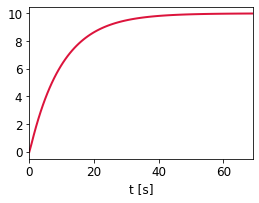

In [361]:
plt.figure(figsize = (4,2.8))
plt.rc('font', size =12)
plt.plot(t1,yFL,'crimson', lw = 2)
plt.xlim(t1[0],t1[-1])
plt.xlabel('t [s]')
plt.show()

### Equivalent system

In [362]:
Te = Ts1 + Ts2 + Ts3 + Ts4

In [363]:
a2 = (1+T1*s)*(1+Te*s)
a2c = sym.Poly(a2)
a2cc = a2c.coeffs()
da2cc = np.array(a2cc,dtype = 'float')

In [364]:
denL2 = da2cc
GLe = ct.tf(numL,denL2)

In [365]:
t1,yFLe = ct.step_response(GLe)

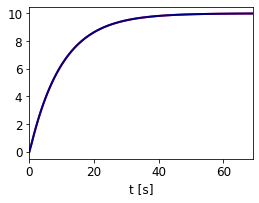

In [366]:
plt.figure(figsize = (4,2.8))
plt.rc('font', size =12)
plt.plot(t1,yFL,'crimson', lw = 2)
plt.plot(t1,yFLe,'navy', lw = 2)
plt.xlim(t1[0],t1[-1])
plt.xlabel('t [s]')
plt.show()

### Magnitude optimum

In [367]:
kR3 = T1/(2*ks*Te)
Ti3 = T1
numPI3 = [kR3*Ti3, kR3]
DenPI3 = [Ti3,0]
FR3 = ct.tf(numPI3,DenPI3)

In [368]:
GLeio = ct.tf2io(GLe, inputs = 'u', outputs = 'y')
Gr3 = ct.tf2io(FR3, inputs = 'e', outputs = 'u')

In [369]:
G1cc3 = ct.interconnect(
        [GLeio,Gr3,sumblk],
#         connections = [['G1.u','Gr.y'],
#                        ['PI.u','-sys.y'],
#                        ['PI.u','ref.u']
#                       ],
    inplist = ['r'],
    outlist = ['y']
)

In [370]:
t3,ycc3 = ct.input_output_response(G1cc3,ts,1.0,[0,0])

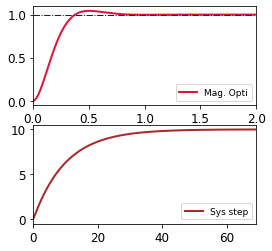

In [371]:
plt.figure(501, figsize = (4,4))
plt.subplot(2,1,1)
plt.plot(t3,ycc3,'crimson', lw = 2, label = "Mag. Opti")
# plt.plot(t3,ycc3,'magenta', lw = 2, label = "Sym. Opti")
plt.axhline(1.0, c = 'b',ls = "-.", lw = 1)
plt.legend(loc = 'lower right', fontsize = 9)
plt.xlim(t3[0],t3[-1300])
plt.subplot(2,1,2)
plt.plot(t1,yFLe,'brown', lw = 2, label = 'Sys step')
plt.xlim(t1[0],t1[-1])
plt.legend(loc = 'lower right', fontsize = 9)
plt.show()

### Symmetrical Optimum

In [372]:
a1 = 2.0
kR4 = T1/(a1*ks*Te)
Ti4 = a1**2*Te
numPI4 = [kR4*Ti4, kR4]
DenPI4 = [Ti4,0]
FR4 = ct.tf(numPI4,DenPI4)

In [373]:
Gr4 = ct.tf2io(FR4, inputs = 'e', outputs = 'u')

In [374]:
G1cc4 = ct.interconnect(
        [GLeio,Gr4,sumblk],
#         connections = [['G1.u','Gr.y'],
#                        ['PI.u','-sys.y'],
#                        ['PI.u','ref.u']
#                       ],
    inplist = ['r'],
    outlist = ['y']
)

In [375]:
t4,ycc4 = ct.input_output_response(G1cc4,ts,1.0,[0,0])

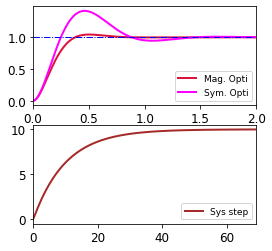

In [376]:
plt.figure(601, figsize = (4,4))
plt.subplot(2,1,1)
plt.plot(t3,ycc3,'crimson', lw = 2, label = "Mag. Opti")
plt.plot(t3,ycc4,'magenta', lw = 2, label = "Sym. Opti")
plt.axhline(1.0, c = 'b',ls = "-.", lw = 1)
plt.legend(loc = 'lower right', fontsize = 9)
plt.xlim(t3[0],t3[-1300])
plt.subplot(2,1,2)
plt.plot(t1,yFLe,'brown', lw = 2, label = 'Sys step')
plt.xlim(t1[0],t1[-1])
plt.legend(loc = 'lower right', fontsize = 9)
plt.show()